# Feature Importance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from random import randint

In [2]:
starcraft_loc = '../data/interimStarcraft_cleaned.csv'
#using index_col = 0 to drop the uncessary number column added by saving the data from the previous notebook.
starcraft = pd.read_csv(starcraft_loc,index_col = 0)
starcraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3338 non-null   int64  
 1   LeagueIndex           3338 non-null   int64  
 2   Age                   3338 non-null   int64  
 3   HoursPerWeek          3338 non-null   int64  
 4   TotalHours            3338 non-null   int64  
 5   APM                   3338 non-null   float64
 6   SelectByHotkeys       3338 non-null   float64
 7   AssignToHotkeys       3338 non-null   float64
 8   UniqueHotkeys         3338 non-null   int64  
 9   MinimapAttacks        3338 non-null   float64
 10  MinimapRightClicks    3338 non-null   float64
 11  NumberOfPACs          3338 non-null   float64
 12  GapBetweenPACs        3338 non-null   float64
 13  ActionLatency         3338 non-null   float64
 14  ActionsInPAC          3338 non-null   float64
 15  TotalMapExplored     

# Importance for the entire data set:

In [3]:
#Split for testing feature importance on the whole set
SCfeatureNames = ['Age','HoursPerWeek','TotalHours','APM','SelectByHotkeys','AssignToHotkeys','UniqueHotkeys','MinimapAttacks','MinimapRightClicks','NumberOfPACs','GapBetweenPACs','ActionLatency','ActionsInPAC','TotalMapExplored','WorkersMade','UniqueUnitsMade','ComplexUnitsMade','ComplexAbilitiesUsed']
X = starcraft[SCfeatureNames]
y = starcraft['LeagueIndex']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)

In [4]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
#create a feature name sorting function based on feature importance
def feat_sort(features,importances):
    paired = zip(features,importances)
    res = sorted(paired, key = lambda x: x[1])
    toRet = []
    for x,y in res:
        toRet.append(x)
    return toRet

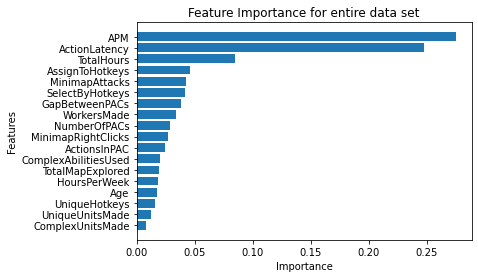

In [6]:
sorted_idx = rf.feature_importances_.argsort()
SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
plt.title('Feature Importance for entire data set')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Importance for each league transition.
We will break the data set into sub sets containing each league transition, ie 1-2, 2-3, 3-4 so on and so forth, and check feature importance for each league transition

In [7]:
leagueTrans = []
for i in range(1,7): 
    leagueTrans.append(pd.concat([starcraft[starcraft['LeagueIndex'] == i],starcraft[starcraft['LeagueIndex'] == i+1]],axis=0))


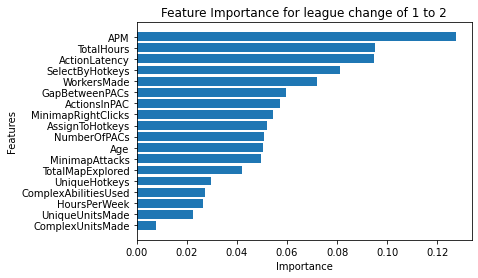

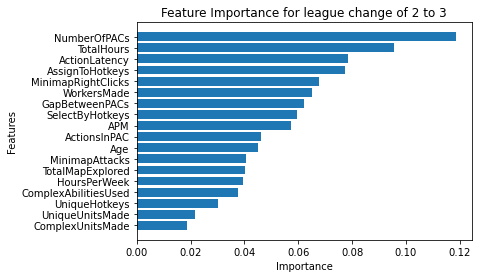

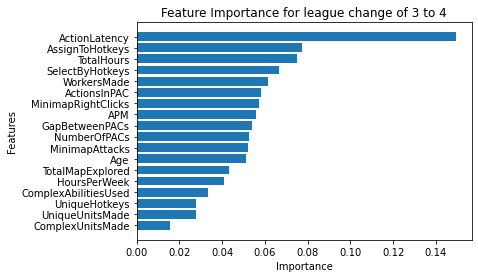

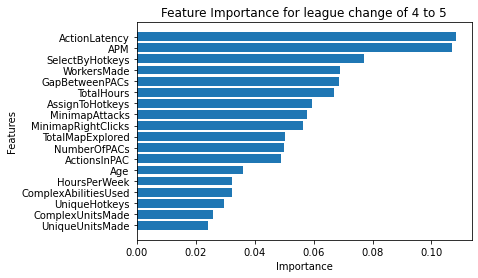

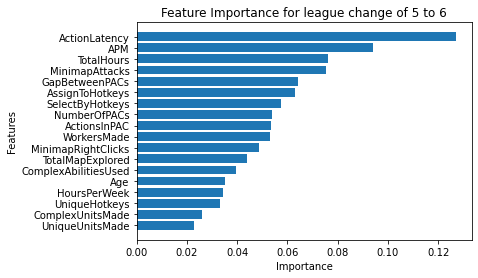

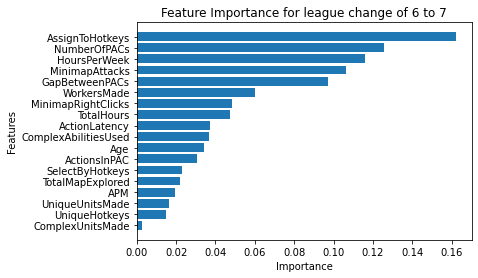

In [8]:
i=1
featImpPerTrans = []
featImpPairs = []
for transition in leagueTrans:
    i+=1
    X = transition[SCfeatureNames]
    y = transition['LeagueIndex']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=420)
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    sorted_idx = rf.feature_importances_.argsort()
    SCfeatureNamesSorted = feat_sort(SCfeatureNames,rf.feature_importances_)
    featImpPerTrans.append(rf.feature_importances_.tolist())
    plt.barh(SCfeatureNamesSorted, rf.feature_importances_[sorted_idx])
    featImpPairs.append((SCfeatureNamesSorted,rf.feature_importances_[sorted_idx].tolist()))
    plt.title('Feature Importance for league change of '+str(i-1)+' to '+str(i))
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [9]:
colNames = ['Transition']
for name in SCfeatureNames:
    colNames.append(name)
importanceDF = pd.DataFrame(columns = colNames)
transNames = []
for i in range(1,7):
    transNames.append(str(i)+' - '+str(i+1))
i = 0
for importance in featImpPerTrans:
    importance.insert(0,transNames[i])
    importanceDF.loc[len(importanceDF.index)] = importance
    i+=1

In [10]:
importanceDF.set_index('Transition', inplace=True)
importanceDF.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
Transition,,,,,,,,,,,,,,,,,,
1 - 2,0.050462,0.026651,0.095128,0.127251,0.081093,0.051853,0.029666,0.049524,0.054205,0.051003,0.059713,0.094794,0.057344,0.041993,0.072086,0.022281,0.007726,0.027227
2 - 3,0.044931,0.039428,0.095566,0.057370,0.059488,0.077255,0.030070,0.040405,0.067616,0.118408,0.061954,0.078437,0.046079,0.040103,0.064995,0.021583,0.018751,0.037562
3 - 4,0.051232,0.041046,0.074846,0.056015,0.066371,0.077592,0.027931,0.051982,0.057357,0.052570,0.054062,0.149242,0.058395,0.043073,0.061682,0.027600,0.015532,0.033472
4 - 5,0.035917,0.032334,0.067084,0.106986,0.077102,0.059475,0.029552,0.057853,0.056463,0.050058,0.068657,0.108161,0.048928,0.050191,0.068978,0.024347,0.025716,0.032197
5 - 6,0.034963,0.034311,0.075919,0.093831,0.057228,0.063156,0.033203,0.075377,0.048682,0.053976,0.064040,0.126869,0.053451,0.043861,0.053056,0.022722,0.025811,0.039543


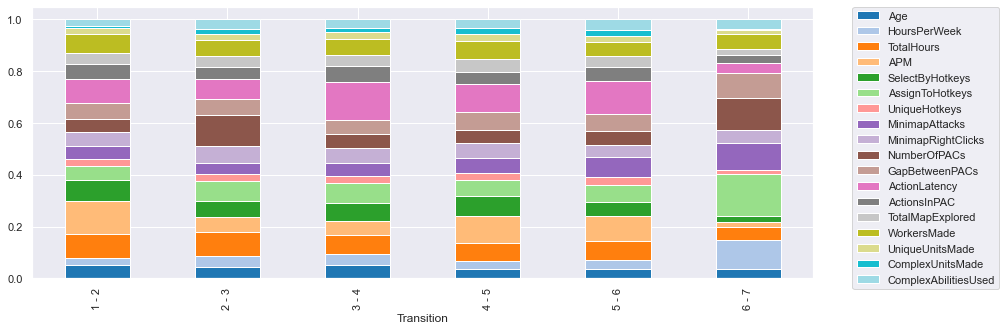

In [11]:
sns.set(rc = {'figure.figsize':(14,5)})
colors = cm.get_cmap('tab20',18)
importanceDF.plot(kind='bar',stacked=True,colormap=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999


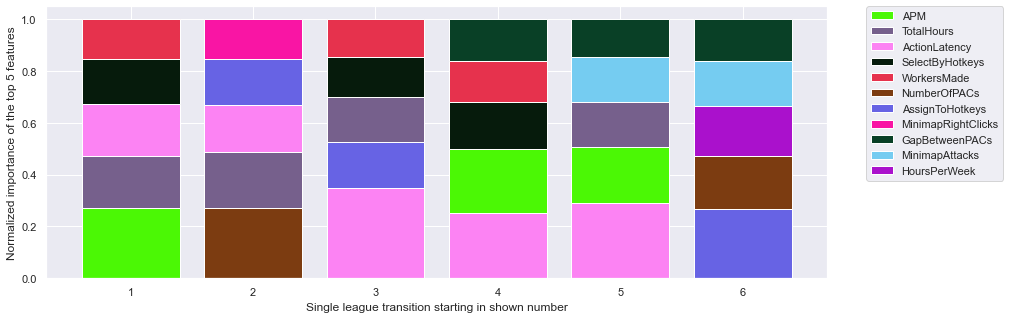

In [12]:
colorsDict={}
handle_list = []
label_list=[]
for num in range(18):
    colorsDict[SCfeatureNames[num]] = '#%06X' % randint(0, 0xFFFFFF)
for i in range(1,7):
    tempDF = pd.DataFrame(columns=['feature','data'])
    for y in range(17,12,-1):
        tempDF.loc[len(tempDF.index)] = [featImpPairs[i-1][0][y],featImpPairs[i-1][1][y]]
    tempDF['data'] = tempDF['data']/tempDF['data'].sum()
    print(tempDF['data'].sum())
    bottom = 0
    for row in tempDF.index:
        plt.bar(x=i,height=tempDF.iloc[row,1],bottom=bottom,label=tempDF.iloc[row,0],color=colorsDict[tempDF.iloc[row,0]])
        bottom += tempDF.iloc[row,1]
        handles, labels = plt.gca().get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in label_list:
                handle_list.append(handle)
                label_list.append(label)
    plt.legend(handle_list,label_list,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Single league transition starting in shown number')
plt.ylabel('Normalized importance of the top 5 features')
plt.show()